<a href="https://colab.research.google.com/github/evelynakim/DATA201/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Project: Examine Regent Scores at Prominent NYC Specialized High Schools

#Research Question: How do math/science-focused NYC specialized high schools compare to other NYC schools in regents scores?

#Schools:
  #Stuyvesant High School
  #The Bronx High School of Science
  #Brooklyn Technical High School
  #Staten Island Technical High School
  #Queens High School for the Sciences at York College

#Goals:
  #examine scores at specialized high school schools
  #examine scores for high schools in each borough (excluding specialized school scores)

#Look specifically at:
  #math/science scores 
  #humanities scores (history, english)
  #mean scores
  #concentration scoring below 65, 65-80, above 80 
  #passing rate

#Visualizations:
  #bar charts
  #line graphs

In [2]:
#import necessary packages & data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [3]:
#exploring data
df.shape

(212331, 15)

In [4]:
#grabbing column names
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [5]:
#looking into data: there are a some missing values (s/na)
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [6]:
#looking into data: the missing values are prevalent enough to be present in both the head and tail functions
df.tail()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


In [7]:
#pulling the different school levels and how many entries there were for each
df.groupby(['School Level'])['School DBN'].count()

School Level
Elementary                             25
High school                        151160
Junior High-Intermediate-Middle     15742
K-12 all grades                      8294
K-8                                  6858
Secondary School                    30252
Name: School DBN, dtype: int64

In [8]:
#checking data types
df.dtypes

School DBN                     object
School Name                    object
School Level                   object
Regents Exam                   object
Year                            int64
Total Tested                    int64
Mean Score                     object
Number Scoring Below 65        object
Percent Scoring Below 65       object
Number Scoring 65 or Above     object
Percent Scoring 65 or Above    object
Number Scoring 80 or Above     object
Percent Scoring 80 or Above    object
Number Scoring CR              object
Percent Scoring CR             object
dtype: object

In [9]:
##CLEANING DATA##
#create new dataframe to edit without disrupting original data
#drop non-high school data (student scores from middle school/below will not be comparable scores to high school scores)
df1 = df[df['School Level'] == 'High school']

#drop school level column (since we're only working with high schools)
#drop CR columns (I want to examine subjects that don't have CR assessment)
df1 = df1.drop(['School Level', 'Number Scoring CR', 'Percent Scoring CR'], axis=1)

#to copy/paste list names I printed the columns as a list
print(df1.columns.tolist())

#change columns with number values to numeric data - float, specifically because you cannot convert columns with missing data to int type
df1[['Percent Scoring Below 65','Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above']] = df1[['Percent Scoring Below 65','Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above']].apply(pd.to_numeric, errors='coerce', axis=1)


['School DBN', 'School Name', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above']


In [10]:
#increase max rows to avoid truncation
pd.set_option('display.max_rows', 500)

#list different school names and their associated school DBN to ID schools of interest later on
df1['School DBN'].groupby(df1['School Name']).unique()

School Name
47 The American Sign Language and English Secondar                            [02M047]
A. Philip Randolph Campus High School                                         [06M540]
ACORN Community High School                                                   [13K499]
Abraham Lincoln High School                                                   [21K410]
Abraham Lincoln Yabc                                                          [21K411]
Academy for Careers in Television and Film                                    [30Q301]
Academy for Conservation and the Environment                                  [18K637]
Academy for Environmental Leadership                                          [32K403]
Academy for Health Careers                                                    [17K751]
Academy for Language and Technology                                           [09X365]
Academy for Scholarship and Entrepreneurship: A Co                            [11X270]
Academy for Social Action      

In [11]:
#Examine first school (Bronx Science HS) and determine any data abnormalities that need to be cleaned
#DBN: 10X445
df1[df1['School DBN'] == '10X445'].sort_values(by=['Regents Exam', 'Year','Total Tested'],
    ascending = [True, True, False])

,School DBN,School Name,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above
6832,10X445,Bronx High School of Science,Algebra2/Trigonometry,2015,762,87.5,32.0,4.2,730.0,95.8,594.0,78.0
31837,10X445,Bronx High School of Science,Algebra2/Trigonometry,2015,747,87.7,29.0,3.9,718.0,96.1,587.0,78.6
71793,10X445,Bronx High School of Science,Algebra2/Trigonometry,2015,600,87.4,25.0,4.2,575.0,95.8,470.0,78.3
165341,10X445,Bronx High School of Science,Algebra2/Trigonometry,2015,450,87.7,15.0,3.3,435.0,96.7,352.0,78.2
115868,10X445,Bronx High School of Science,Algebra2/Trigonometry,2015,418,86,26.0,6.2,392.0,93.8,306.0,73.2
115867,10X445,Bronx High School of Science,Algebra2/Trigonometry,2015,344,89.3,6.0,1.7,338.0,98.3,288.0,83.7
165345,10X445,Bronx High School of Science,Algebra2/Trigonometry,2015,194,87.9,8.0,4.1,186.0,95.9,156.0,80.4
71794,10X445,Bronx High School of Science,Algebra2/Trigonometry,2015,162,87.7,7.0,4.3,155.0,95.7,124.0,76.5
165344,10X445,Bronx High School of Science,Algebra2/Trigonometry,2015,62,88.8,3.0,4.8,59.0,95.2,51.0,82.3
165343,10X445,Bronx High School of Science,Algebra2/Trigonometry,2015,43,82,5.0,11.6,38.0,88.4,25.0,58.1


In [12]:
##CLEANING DATA##
#there are some issues with the data (missing data, duplicate data, data that indicates some students took tests on different dates).
#with all of this duplicate data, there's no real way to meaningfully combine data from different test dates, so will ignore.

#My Approach:
#track and ignore rows w/ missing values. if that disqualifies a whole test, must remove from all analyses.
#drop values that indicate duplicate data by dropping obvious duplicates (same values in different rows) and keeping only testing data with the highest number of test takers per year/test/school
#drop column focusing on percentage so I can perform my own calculations

In [13]:
#drop rows with missing data - will remove all 's', but keep some na datapoints as there are tests with no CR benchmarks that still have test performance data in other columns
df1 = df1[df1['Mean Score'] != 's']

#drop obvious duplicates
df1.drop_duplicates (inplace=True)

#create new column for 65-79
df1['Number Scoring 65 - 79'] = df1['Number Scoring 65 or Above'] - df1['Number Scoring 80 or Above']
df1['Percent Scoring 65 - 79'] = df1['Number Scoring 65 - 79'] / df1['Total Tested']

#drop scoring 65+ columns
df1 = df1.drop(['Number Scoring 65 or Above', 'Percent Scoring 65 or Above'], axis=1)

#to copy/paste list names I printed the columns as a list
print(df1.columns.tolist())

#rearrange columns so new columns are in place of the columns they're replacing
df1 = df1[['School DBN', 'School Name', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 - 79', 'Percent Scoring 65 - 79', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above']]

['School DBN', 'School Name', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above', 'Number Scoring 65 - 79', 'Percent Scoring 65 - 79']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [14]:
#keep max test takers from each row for each regent/year
df1['Max Tested'] = df1.groupby(['School DBN','Regents Exam','Year'])['Total Tested'].transform(max)
df1 = df1[df1['Total Tested'] == df1['Max Tested']]

#rearrange columns so max tested is next to total tested (for easy comparison)
df1 = df1[['School DBN', 'School Name', 'Regents Exam', 'Year', 'Total Tested', 'Max Tested', 'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 - 79', 'Percent Scoring 65 - 79', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above']]

#test that the column worked as planned
df1

#drop max tested
df1.drop(['Max Tested'], axis=1, inplace=True)

In [15]:
#keep only rows that focus on regents exams of interest
#2016-2017 exam replacements: Algebra2/Trig --> Common Core Algebra2, English --> Common Core English

#tests to zero in on: 
#2015: 'Algebra2/Trigonometry', 'English', 'Global History and Geography', 'Physical Settings/Chemistry', 'Physical Settings/Physics', 'U.S. History and Government'
#2016/2017: 'Common Core Algebra2', 'Common Core English', 'Global History and Geography', 'Physical Settings/Chemistry', 'Physical Settings/Physics', 'U.S. History and Government'

#create filters for easier manipulation
#used loc method to avoid warning about setting a value on a copy of a slice from a dataframe
f0 = df1.loc[:,'Regents Exam'].isin(['Global History and Geography', 'Physical Settings/Chemistry', 'Physical Settings/Physics', 'U.S. History and Government'])
f1 = df1.loc[:,'Regents Exam'].isin(['Algebra2/Trigonometry','English'])
f2 = df1.loc[:,'Year'] == 2015
f3 = df1.loc[:,'Regents Exam'].isin(['Common Core Algebra2', 'Common Core English'])
f4 = df1.loc[:,'Year'] != 2015

#include all regents scores for the following subjects and years
  #all scores for global history, chemistry, physics, and us history
  #2015 scores for algebra2/trig & english
  #non-2015 scores for common core algebra2 and common core english
df1 = df1[(f0) | (f1 & f2) | (f3 & f4)]

#rename regents in same subject to share single name for easier analysis
df1.loc[:, 'Regents Exam'] = df1.loc[:,'Regents Exam'].replace({'Algebra2/Trigonometry' : 'Algebra2', 'Common Core Algebra2' : 'Algebra2', 'Global History and Geography': 'Global History', 'Physical Settings/Chemistry': 'Chemistry','Physical Settings/Physics': 'Physics', 'U.S. History and Government': 'U.S. History', 'Common Core English': 'English'})

In [16]:
#pull unique exam subjects to ensure renaming was successful
df1['Regents Exam'].unique()

array(['Algebra2', 'English', 'Global History', 'U.S. History',
       'Chemistry', 'Physics'], dtype=object)

In [17]:
#create new dataframe with only number count columns (can't aggregate percentages in analysis)
dfnum = df1.drop(['Percent Scoring Below 65', 'Percent Scoring 65 - 79', 'Percent Scoring 80 or Above'], axis=1)

#create new dataframe with only percentage columns (for percentage only analysis)
dfper = df1.drop(['Number Scoring Below 65', 'Number Scoring 65 - 79', 'Number Scoring 80 or Above'], axis=1)

In [18]:
#Re-examine Bronx Science HS
#DBN: 10X445

#create dataframe for Bronx Science (bxsci) - focusing on count (not percentile), sorted by exam, then year, then total tested and mean score (to make sure they match up!)
bxsci = dfnum[dfnum['School DBN'] == '10X445'].sort_values(
    by=['Regents Exam', 'Year','Total Tested','Mean Score'],
    ascending = [True, True, False, False])

#drop DBN and name because we're only looking at one school & group data by exam and year, adding together all results
bxsci.drop(['School DBN','School Name'], axis=1).groupby(['Regents Exam','Year']).sum()

Total Tested  ...  Number Scoring 80 or Above
Regents Exam   Year                ...                            
Algebra2       2015           762  ...                       594.0
               2016           734  ...                       561.0
               2017           776  ...                       669.0
Chemistry      2015           775  ...                       677.0
               2016           795  ...                       656.0
               2017           850  ...                       733.0
English        2015           787  ...                       774.0
               2016           726  ...                       723.0
               2017           725  ...                       722.0
Global History 2015           741  ...                       734.0
               2016           728  ...                       718.0
               2017           757  ...                       752.0
Physics        2015           798  ...                       679.0
               2016           772  ...                       622.0
               2017           728  ...                       648.0
U.S. History   2015           782  ...                       781.0
               2016           719  ...                       718.0
               2017           663  ...                       662.0

[18 rows x 4 columns]

In [19]:
#Do the same for all other schools
#Brooklyn Tech HS
#DBN: 13K430
bktech = dfnum[dfnum['School DBN'] == '13K430'].sort_values(
    by=['Regents Exam', 'Year','Total Tested','Mean Score'],
    ascending = [True, True, False, False])

bktech.drop(['School DBN','School Name'], axis=1).groupby(['Regents Exam','Year']).sum()

Total Tested  ...  Number Scoring 80 or Above
Regents Exam   Year                ...                            
Algebra2       2015          1477  ...                       967.0
               2016          1352  ...                       884.0
               2017          1380  ...                      1005.0
Chemistry      2015          1421  ...                       651.0
               2016          1393  ...                       757.0
               2017          1467  ...                       978.0
English        2015           815  ...                       734.0
               2016          1312  ...                      1290.0
               2017          1333  ...                      1318.0
Global History 2015          1337  ...                      1270.0
               2016          1350  ...                      1254.0
               2017          1453  ...                      1365.0
Physics        2015          1515  ...                       917.0
               2016          1648  ...                       956.0
               2017          1729  ...                      1171.0
U.S. History   2015          1278  ...                      1256.0
               2016          1209  ...                      1188.0
               2017          1205  ...                      1174.0

[18 rows x 4 columns]

In [20]:
#Queens Science HS
#DBN: 28Q687
qsci = dfnum[dfnum['School DBN'] == '28Q687'].sort_values(
    by=['Regents Exam', 'Year','Total Tested','Mean Score'],
    ascending = [True, True, False, False])

qsci.drop(['School DBN','School Name'], axis=1).groupby(['Regents Exam','Year']).sum()
#this school had too few people take the 2015 English regents exam to share scoring concentration numbers while maintaining student anonymity

Total Tested  ...  Number Scoring 80 or Above
Regents Exam   Year                ...                            
Algebra2       2015           137  ...                       119.0
               2016           113  ...                        55.0
               2017           109  ...                        92.0
Chemistry      2015           132  ...                        91.0
               2016            92  ...                        65.0
               2017           121  ...                        99.0
English        2016           115  ...                       115.0
               2017           109  ...                       108.0
Global History 2015           119  ...                       118.0
               2016           108  ...                       106.0
               2017           116  ...                       110.0
Physics        2015           115  ...                        97.0
               2016           131  ...                       113.0
               2017            91  ...                        78.0
U.S. History   2015            99  ...                        95.0
               2016           116  ...                       115.0
               2017           104  ...                       103.0

[17 rows x 4 columns]

In [21]:
#Staten Island Tech HS
#DBN: 31R605
sitech = dfnum[dfnum['School DBN'] == '31R605'].sort_values(
    by=['Regents Exam', 'Year','Total Tested','Mean Score'],
    ascending = [True, True, False, False])

#drop DBN and name because we're only looking at one school & group data by exam and year, adding together all results
sitech.drop(['School DBN','School Name'], axis=1).groupby(['Regents Exam','Year']).sum()

Total Tested  ...  Number Scoring 80 or Above
Regents Exam   Year                ...                            
Algebra2       2015           329  ...                       275.0
               2016           306  ...                       231.0
               2017           348  ...                       261.0
Chemistry      2015           327  ...                       282.0
               2016           376  ...                       320.0
               2017           334  ...                       265.0
English        2015           308  ...                       284.0
               2016           326  ...                       326.0
               2017           313  ...                       313.0
Global History 2015           329  ...                       308.0
               2016           316  ...                       305.0
               2017           325  ...                       310.0
Physics        2015           311  ...                       267.0
               2016           322  ...                       232.0
               2017           365  ...                       279.0
U.S. History   2015           210  ...                       203.0
               2016           238  ...                       234.0
               2017           235  ...                       231.0

[18 rows x 4 columns]

In [22]:
#Stuyvesant HS
#DBN: 02M475
stuy = dfnum[dfnum['School DBN'] == '02M475'].sort_values(
    by=['Regents Exam', 'Year','Total Tested','Mean Score'],
    ascending = [True, True, False, False])

stuy.drop(['School DBN','School Name'], axis=1).groupby(['Regents Exam','Year']).sum()

Total Tested  ...  Number Scoring 80 or Above
Regents Exam   Year                ...                            
Algebra2       2015           875  ...                       819.0
               2016           785  ...                       634.0
               2017           796  ...                       732.0
Chemistry      2015           841  ...                       719.0
               2016           828  ...                       696.0
               2017           836  ...                       733.0
English        2015           793  ...                       765.0
               2016           828  ...                       824.0
               2017           824  ...                       817.0
Global History 2015           843  ...                       832.0
               2016           835  ...                       824.0
               2017           838  ...                       832.0
Physics        2015           697  ...                       651.0
               2016           730  ...                       646.0
               2017           742  ...                       687.0
U.S. History   2015           748  ...                       743.0
               2016           757  ...                       753.0
               2017           735  ...                       735.0

[18 rows x 4 columns]

In [23]:
##COMBINING BOROUGHS## - fuzzy match to create databases for each borough

#there's no borough column - but School DBN has different letters for each borough
#X = Bronx
#K = Brooklyn (Kings County)
#M = Manhattan
#Q = Queens
#R = Staten Island (Richmond County)

#Specialized HS DBNS: 31R605 28Q687 02M475 10X445 13K430

#increase figure size for vizualizations with a lot of data
#plt.rcParams["figure.figsize"] = (20,10)

##BRONX##
#create number and percent dataframes representaing all bronx schools 
bx = dfnum[dfnum['School DBN'].str.contains('X')].sort_values(by=['School Name', 'Regents Exam', 'Year'])
#exclude bronx science hs
bx = bx[bx['School DBN'] != '10X445']
#rename all school names in new dataframes to 'Bronx Schools'
bx.loc[:, 'School Name'] = 'Bronx Schools'

##BROOKLYN##
bk = dfnum[dfnum['School DBN'].str.contains('K')].sort_values(by=['School Name', 'Regents Exam', 'Year'])
#exclude brooklyn tech hs
bk = bk[bk['School DBN'] != '13K430']
#rename all school names in new dataframes to 'Brooklyn Schools'
bk.loc[:, 'School Name'] = 'Brooklyn Schools'

##MANHATTAN##
mn = dfnum[dfnum['School DBN'].str.contains('M')].sort_values(by=['School Name', 'Regents Exam', 'Year'])
#exclude stuyvesant hs
mn = mn[mn['School DBN'] != '02M475'] 
#rename all school names in new dataframes to 'Manhattan Schools'
mn.loc[:, 'School Name'] = 'Manhattan Schools'

##QUEENS##
qn = dfnum[dfnum['School DBN'].str.contains('Q')].sort_values(by=['School Name', 'Regents Exam', 'Year'])
#exclude queens science hs
qn = qn[qn['School DBN'] != '28Q687']
#rename all school names in new dataframes to 'Queens Schools'
qn.loc[:, 'School Name'] = 'Queens Schools'

##STATEN ISLAND##
si = dfnum[dfnum['School DBN'].str.contains('R')].sort_values(by=['School Name', 'Regents Exam', 'Year'])
#exclude staten island tech hs
si = si[si['School DBN'] != '31R605']
#rename all school names in new dataframes to 'Staten Island Schools'
si.loc[:, 'School Name'] = 'Staten Island Schools'

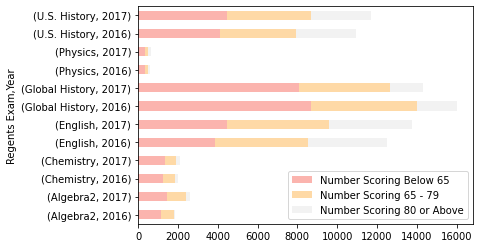

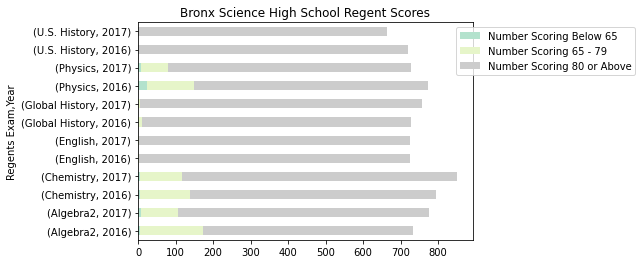

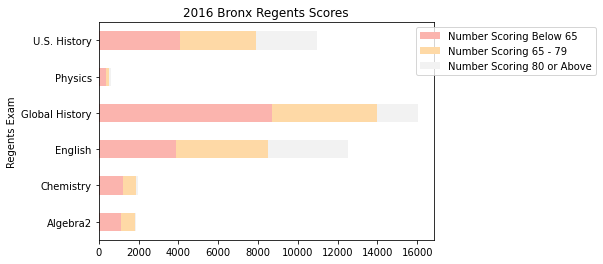

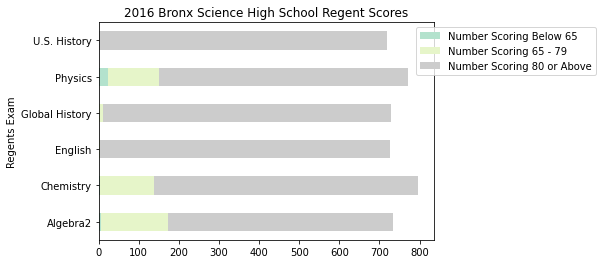

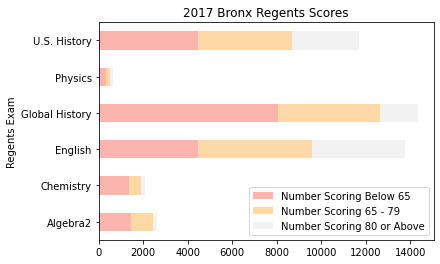

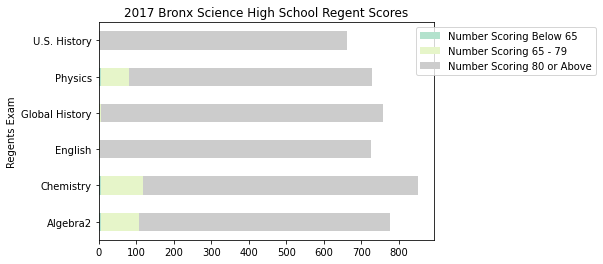

In [24]:
##BRONX VS BRONX SCIENCE
#create stacked bar chart excluding total tested, sorted by Regents Exam and Year
#bronx
bx[bx['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam','Year']).sum().plot.barh(stacked=True, colormap='Pastel1')
#bronx science
bxsci[bxsci['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam', 'Year']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('Bronx Science High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

#stacked bar chart for 2016
bx[bx['Year'] == 2016].drop(['Year','Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('2016 Bronx Regents Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
bxsci[bxsci['Year'] == 2016].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2016 Bronx Science High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

#stacked bar chart for 2017
bx[bx['Year'] == 2017].drop(['Year','Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('2017 Bronx Regents Scores')
bxsci[bxsci['Year'] == 2017].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2017 Bronx Science High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

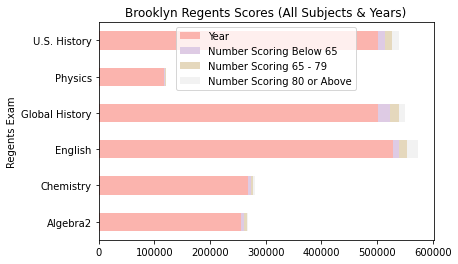

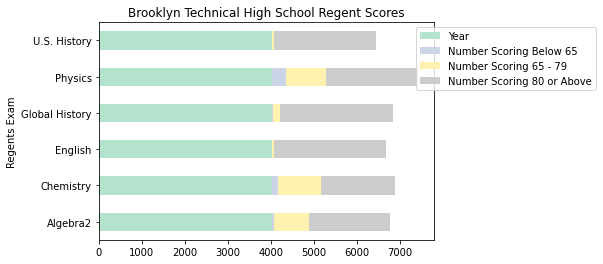

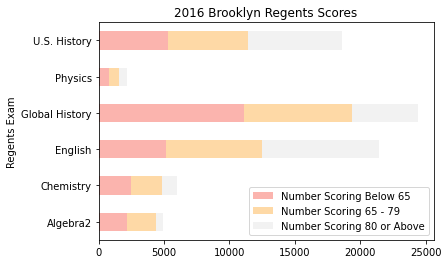

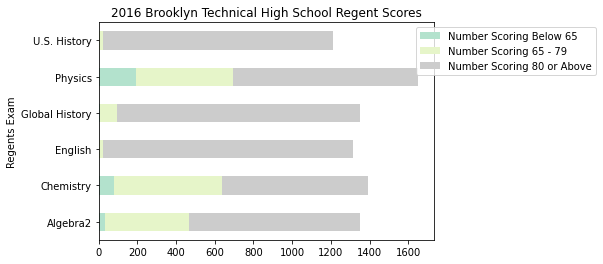

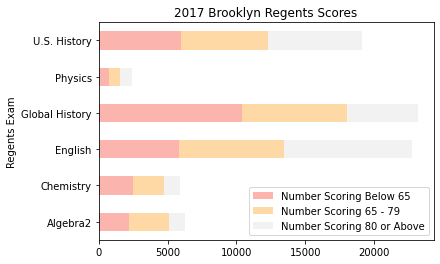

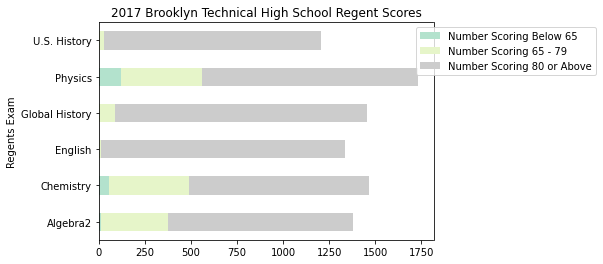

In [25]:
##BROOKLYN VS BROOKLYN TECH##
#create bar chart excluding total tested, sorted by Regents Exam and Year
#brooklyn
bk[bk['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('Brooklyn Regents Scores (All Subjects & Years)')
#brooklyn tech
bktech[bktech['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('Brooklyn Technical High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

#stacked bar chart for 2016
bk[bk['Year'] == 2016].drop(['Year','Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('2016 Brooklyn Regents Scores')
bktech[bktech['Year'] == 2016].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2016 Brooklyn Technical High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

#stacked bar chart for 2017
bk[bk['Year'] == 2017].drop(['Year','Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('2017 Brooklyn Regents Scores')
bktech[bktech['Year'] == 2017].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2017 Brooklyn Technical High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

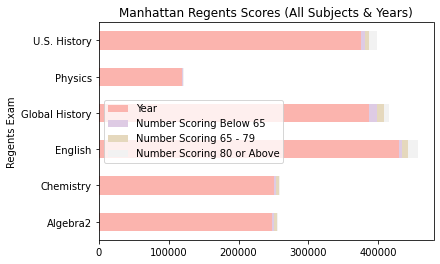

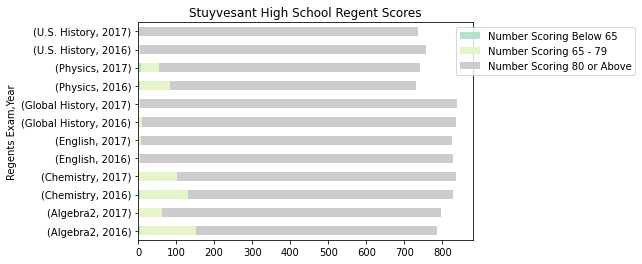

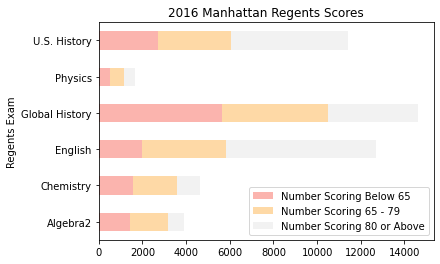

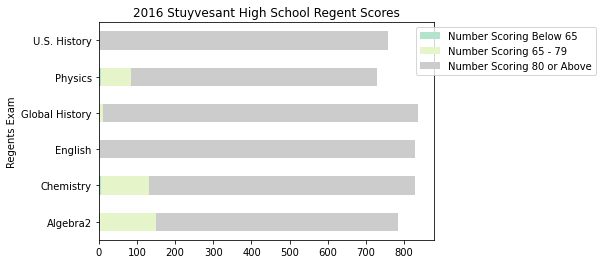

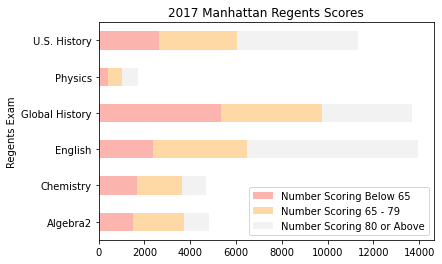

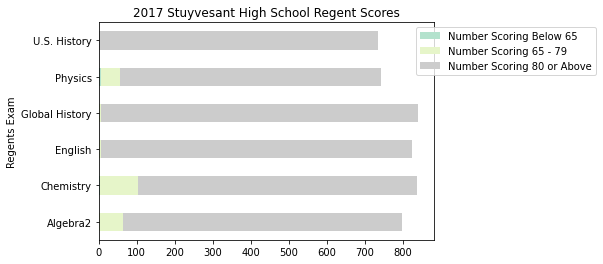

In [26]:
##MANHATTAN VS STUYVESANT
#create bar chart excluding total tested, sorted by Regents Exam and Year
#manhattan
mn[mn['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('Manhattan Regents Scores (All Subjects & Years)')
#stuyvesant
stuy[stuy['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam', 'Year']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('Stuyvesant High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

#stacked bar chart for 2016
mn[mn['Year'] == 2016].drop(['Year','Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('2016 Manhattan Regents Scores')
stuy[stuy['Year'] == 2016].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2016 Stuyvesant High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

#stacked bar chart for 2017
mn[mn['Year'] == 2017].drop(['Year','Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('2017 Manhattan Regents Scores')
stuy[stuy['Year'] == 2017].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2017 Stuyvesant High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

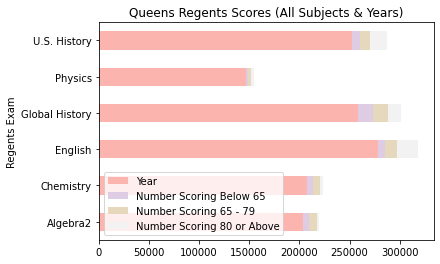

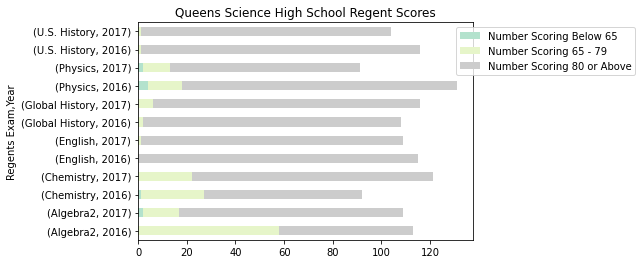

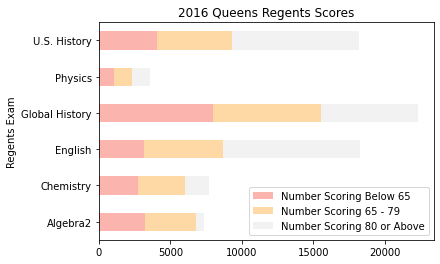

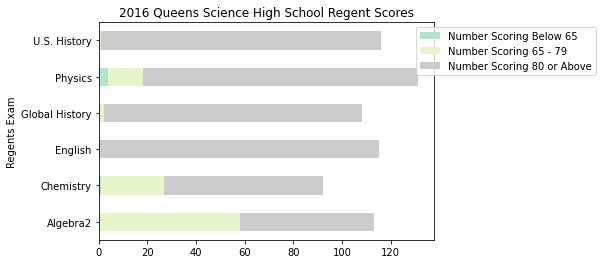

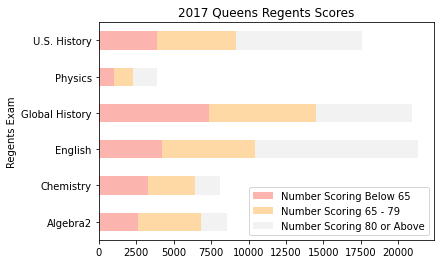

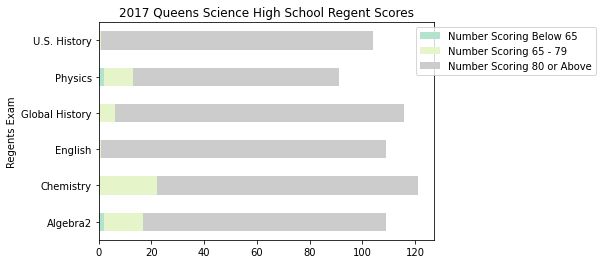

In [27]:
#QUEENS VS QUEENS SCIENCE
#create bar chart excluding total tested, sorted by Regents Exam and Year
#queens
qn[qn['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('Queens Regents Scores (All Subjects & Years)')
#queens science
qsci[qsci['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam', 'Year']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('Queens Science High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

#stacked bar chart for 2016
qn[qn['Year'] == 2016].drop(['Year','Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('2016 Queens Regents Scores')
qsci[qsci['Year'] == 2016].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2016 Queens Science High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

#stacked bar chart for 2017
qn[qn['Year'] == 2017].drop(['Year','Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('2017 Queens Regents Scores')
qsci[qsci['Year'] == 2017].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2017 Queens Science High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

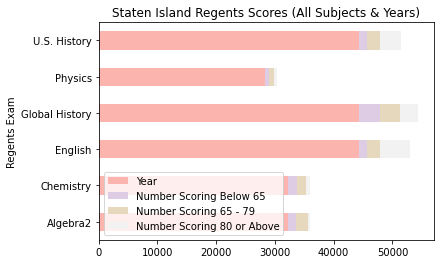

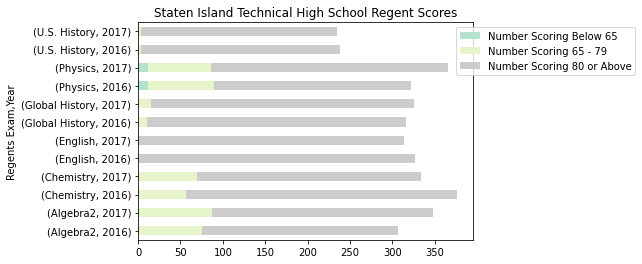

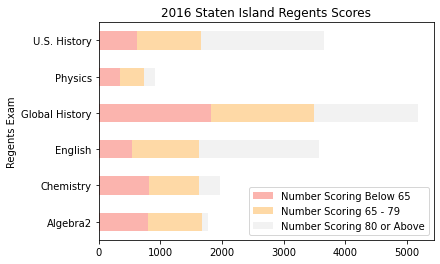

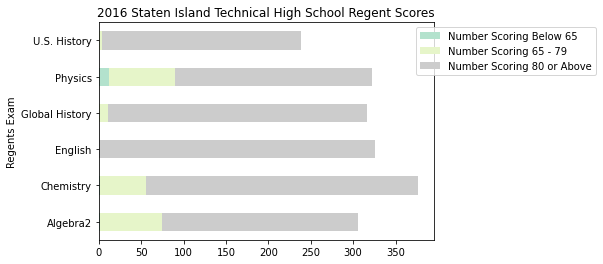

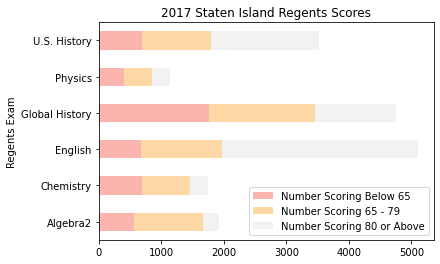

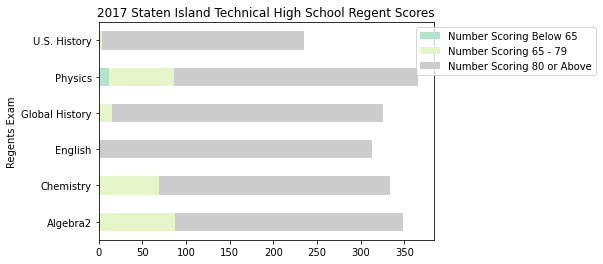

In [28]:
##STATEN ISLAND VS STATEN ISLAND TECH
#create bar chart excluding total tested, sorted by Regents Exam and Year
#staten island:
si[si['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('Staten Island Regents Scores (All Subjects & Years)')
#si tech:
sitech[sitech['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam', 'Year']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('Staten Island Technical High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))


#stacked bar chart for 2016
si[si['Year'] == 2016].drop(['Year','Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('2016 Staten Island Regents Scores')
sitech[sitech['Year'] == 2016].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2016 Staten Island Technical High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

#stacked bar chart for 2017
si[si['Year'] == 2017].drop(['Year','Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel1')
plt.title('2017 Staten Island Regents Scores')

sitech[sitech['Year'] == 2017].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2017 Staten Island Technical High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

In [29]:
#combine all NYC schools
findsch = ['X', 'K', 'Q', 'R', 'M']
allsch = dfnum.copy()
allsch[allsch['School DBN'].str.contains('|'.join(findsch))]

#combine all specialized schools of interest
specsch = dfnum[dfnum['School DBN'].isin(['31R605', '28Q687', '02M475', '10X445', '13K430'])]

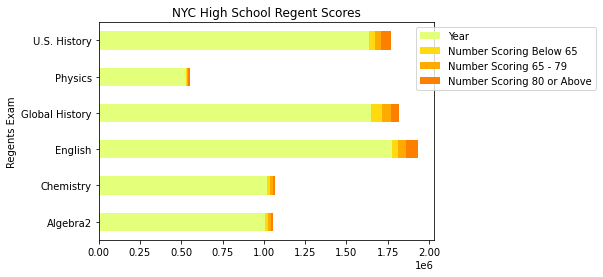

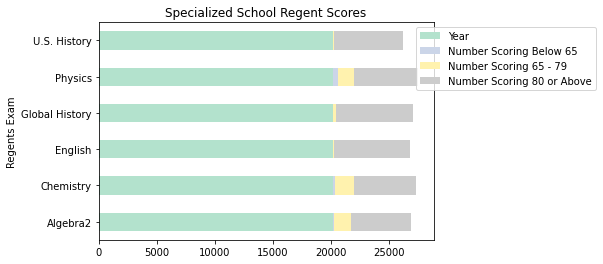

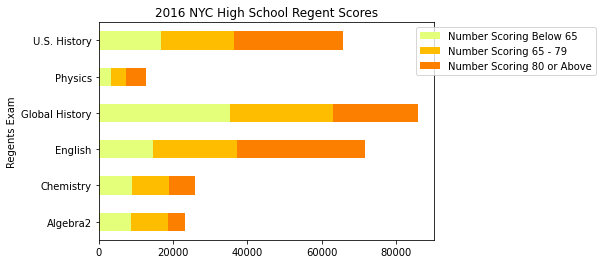

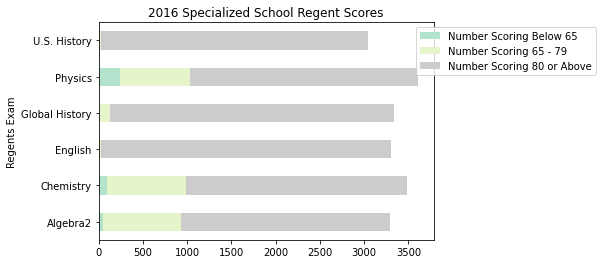

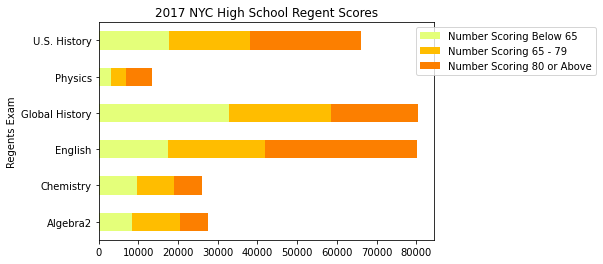

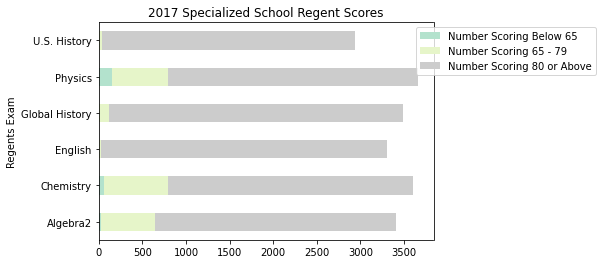

In [30]:
##ALL NYC VS SPECIALIZED HS VISUALIZATIONS##

#stacked bar chart, grouped by exam
#all nyc
allsch[allsch['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Wistia')
plt.title('NYC High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
#specialized hs
specsch[specsch['Year'] != 2015].drop(['Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('Specialized School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

#stacked bar chart for 2016
allsch[allsch['Year'] == 2016].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Wistia')
plt.title('2016 NYC High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
specsch[specsch['Year'] == 2016].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2016 Specialized School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))


#stacked bar chart for 2017
allsch[allsch['Year'] == 2017].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Wistia')
plt.title('2017 NYC High School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
specsch[specsch['Year'] == 2017].drop(['Year', 'Total Tested'], axis=1).groupby(['Regents Exam']).sum().plot.barh(stacked=True, colormap='Pastel2')
plt.title('2017 Specialized School Regent Scores')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))